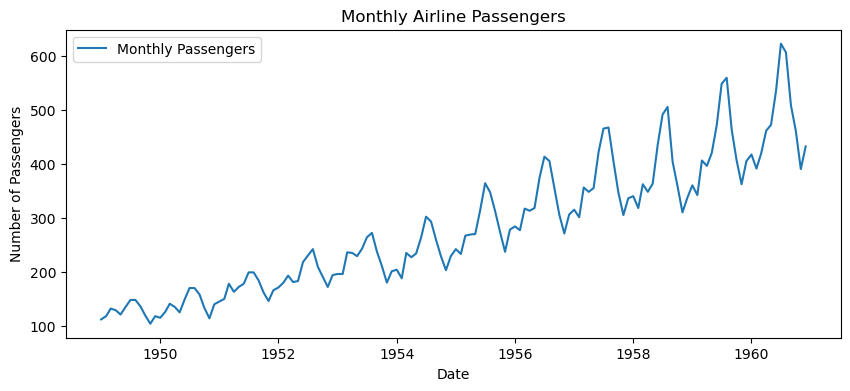

C:\Users\hp\AppData\Local\Temp\ipykernel_27304\1289327643.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


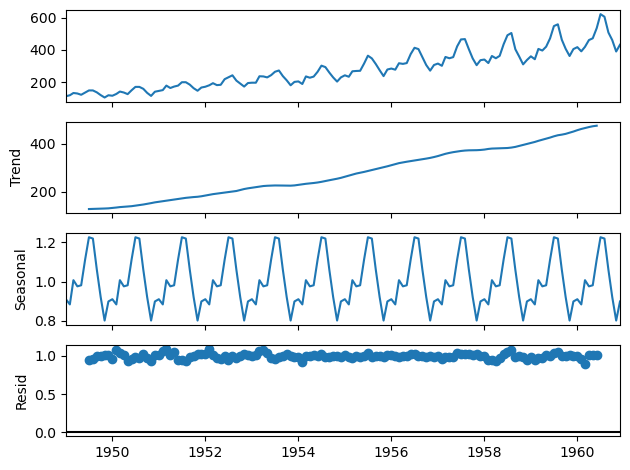

ADF Statistic: 0.8153688792060547
p-value: 0.9918802434376411
The series is non-stationary.


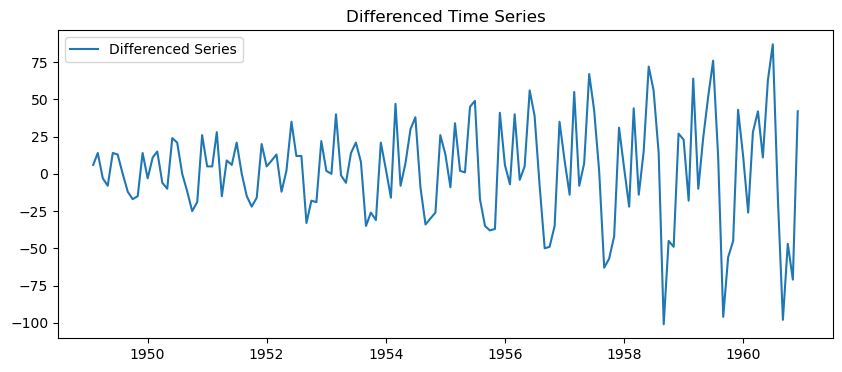

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Thu, 05 Jun 2025   AIC                           1394.683
Time:                        12:52:20   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

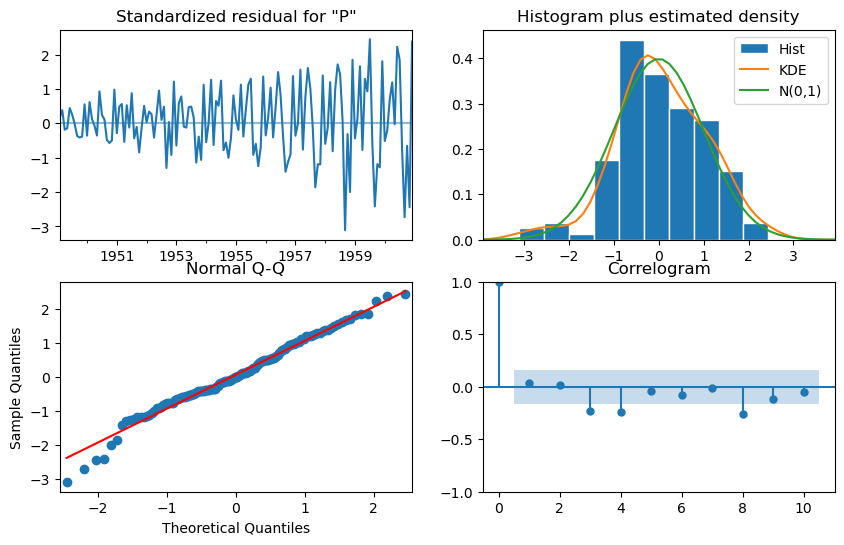

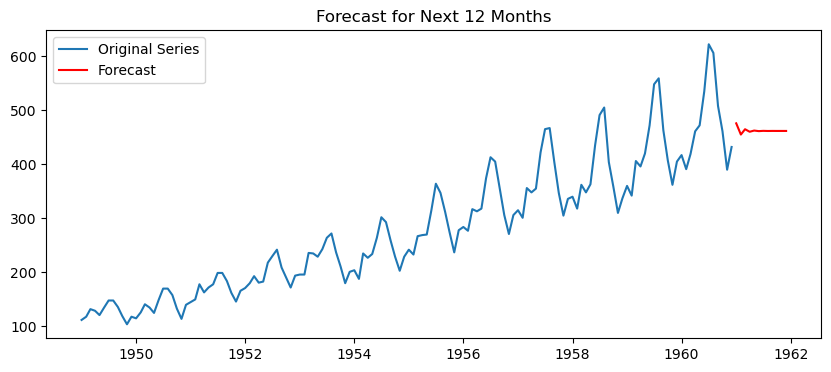

In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Step 2: Load time series data (you can replace with your own CSV file)
# Example: Monthly airline passengers data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Step 3: Plot the original time series
plt.figure(figsize=(10, 4))
plt.plot(df, label='Monthly Passengers')
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Step 4: Decompose the time series
decomposition = seasonal_decompose(df, model='multiplicative')
decomposition.plot()
plt.tight_layout()
plt.show()

# Step 5: Perform stationarity test (ADF test)
result = adfuller(df['Passengers'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")

# Step 6: Differencing to make series stationary (if needed)
df_diff = df.diff().dropna()

plt.figure(figsize=(10, 4))
plt.plot(df_diff, label='Differenced Series')
plt.title('Differenced Time Series')
plt.legend()
plt.show()

# Step 7: Fit ARIMA model
model = ARIMA(df, order=(1, 1, 1))  # (p, d, q)
model_fit = model.fit()

# Step 8: Summary and diagnostics
print(model_fit.summary())
model_fit.plot_diagnostics(figsize=(10, 6))
plt.show()

# Step 9: Forecasting next 12 months
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start=df.index[-1], periods=13, freq='MS')[1:]

plt.figure(figsize=(10, 4))
plt.plot(df, label='Original Series')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Forecast for Next 12 Months')
plt.legend()
plt.show()


In [4]:
!pip install folium


  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/be/2e/4dbe5577b7abcc8bc2fdef7e1b0e100ec654ecd47a2bede7ee1516f53f29/folium-0.19.7-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/f8/9d/91cddd38bd00170aad1a4b198c47b4ed716be45c234e09b835af41f4e717/branca-0.8.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/112.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/112.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/112.5 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/112.5 kB 330.3 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/112.5 kB 409.6 kB/s eta 0:00:01
   -------------------------------------- 112.5/112.5 kB 594.3 kB/s eta 0:00:00


In [5]:
# Step 1: Import libraries
import pandas as pd
import folium

# Step 2: Load dataset (Earthquake data with location info)
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.csv"
df = pd.read_csv(url)

# Show basic info
print(df[['place', 'mag', 'time', 'latitude', 'longitude']].head())

# Step 3: Create a base map centered globally
m = folium.Map(location=[0, 0], zoom_start=2)

# Step 4: Add markers for each earthquake
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['mag'] * 2,  # magnitude as size
        popup=f"{row['place']} (Mag: {row['mag']})",
        color='red',
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

# Step 5: Save and display map
m.save("earthquake_map.html")
print("Map saved as 'earthquake_map.html'")


                         place   mag                      time   latitude  \
0     54 km NW of Toyah, Texas  2.60  2025-06-05T06:43:47.629Z  31.668000   
1   35 km NW of Mýrina, Greece  4.70  2025-06-05T05:18:38.412Z  40.132500   
2  52 km S of Gazipaşa, Turkey  4.30  2025-06-05T04:32:32.358Z  35.802100   
3   63 km NW of Ocampo, Mexico  4.90  2025-06-05T03:26:21.976Z  27.648400   
4    3 km SE of Tres Pinos, CA  2.55  2025-06-05T01:01:27.690Z  36.774666   

    longitude  
0 -104.191000  
1   24.812400  
2   32.229800  
3 -102.914600  
4 -121.289169  
Map saved as 'earthquake_map.html'


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


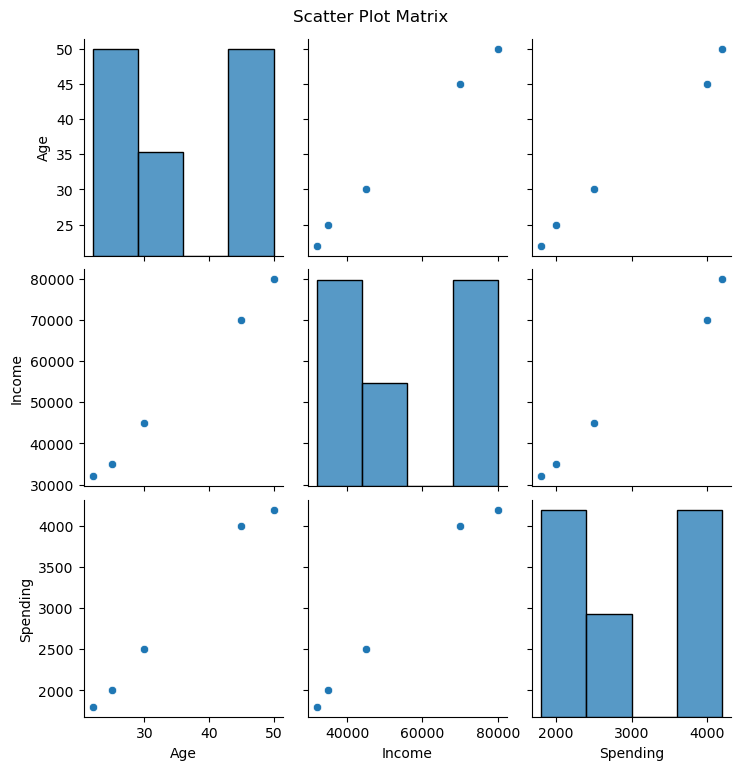

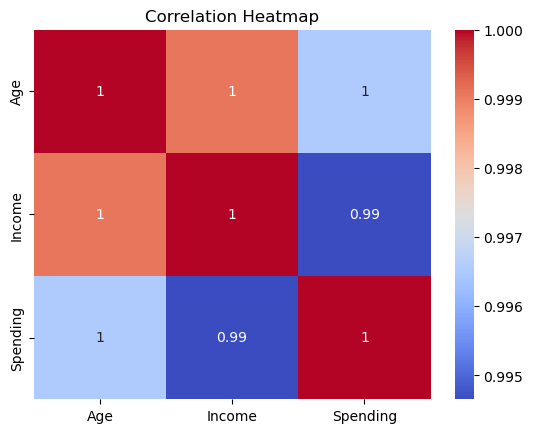

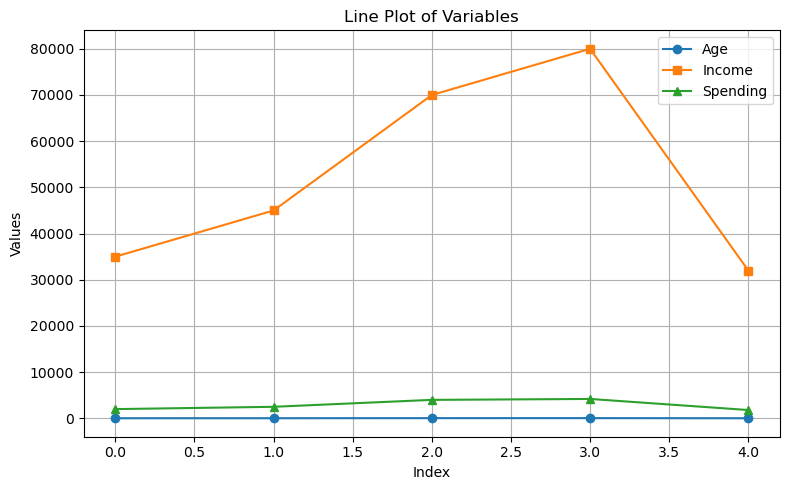

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'Age': [25, 30, 45, 50, 22],
    'Income': [35000, 45000, 70000, 80000, 32000],
    'Spending': [2000, 2500, 4000, 4200, 1800]
}
df = pd.DataFrame(data)

# ----- 1. Scatter Plot Matrix -----
sns.pairplot(df)
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()

# ----- 2. Correlation Heatmap -----
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ----- 3. Line Plot for Trends -----
plt.figure(figsize=(8, 5))
plt.plot(df['Age'], label='Age', marker='o')
plt.plot(df['Income'], label='Income', marker='s')
plt.plot(df['Spending'], label='Spending', marker='^')
plt.title("Line Plot of Variables")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# A complete example of using SelectFromModel from scikit-learn along with visualization of selected features using a bar plot.

We'll use a SelectFromModel, RandomForestClassifier on the Iris dataset and visualize the feature importances before and after feature selection.It:

Trains a RandomForestClassifier on the Iris dataset.

Displays all feature importances.

Uses SelectFromModel to keep features above the median importance.

Plots only the selected important features.


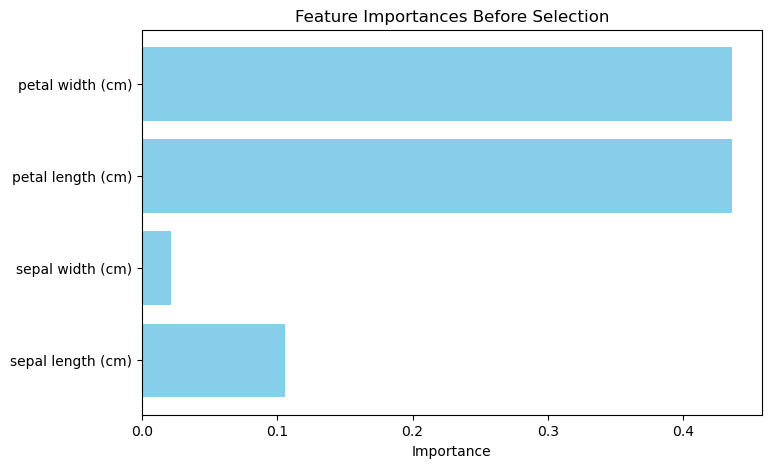

Selected Features: ['petal length (cm)', 'petal width (cm)']


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


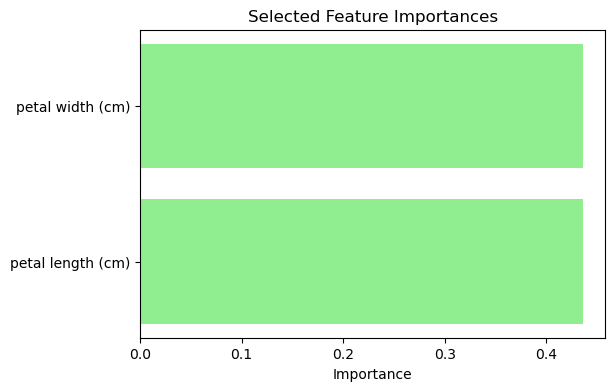

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Fit RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Visualize all feature importances
importances = model.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(X.columns, importances, color='skyblue')
plt.title('Feature Importances Before Selection')
plt.xlabel('Importance')
plt.show()

# SelectFromModel to keep only important features
selector = SelectFromModel(model, threshold='median', prefit=True)
X_selected = selector.transform(X)
selected_features = X.columns[selector.get_support()]

# Show selected features
print("Selected Features:", list(selected_features))

# Visualize selected features
selected_importances = importances[selector.get_support()]
plt.figure(figsize=(6, 4))
plt.barh(selected_features, selected_importances, color='lightgreen')
plt.title('Selected Feature Importances')
plt.xlabel('Importance')
plt.show()
